## TKX 피트니스에 오신 것을 환영합니다!

안녕하세요! TKX 피트니스 데이터분석팀에 오신 것을 환영합니다.

TKX는 국내 최대의 프렌차이즈 피트니스 센터로서, 매월 수 천명에 달하는 신규 회원을 받아 데이터를 분석하고 있습니다.

TKX 피트니스의 장점은 프로그래밍 언어 파이썬(Python)과 데이터 분석 프레임워크 판다스(Pandas)를 활용한 면밀한 데이터 분석입니다. 이 데이터 분석을 바탕으로 KTX의 오퍼레이션 팀 / 코칭 팀은 피트니스 센터에 방문하는 고객 분들, 그리고 방문하지 않는 고객 분들에게도 최선의 맞춤 서비스를 제공해 드리고 있습니다.

오늘 이 노트북을 받은 분이 해주셔야 하는 일은 2016년도 1월부터 2017년도 12월까지의 신규 가입 고객 데이터를 받아와, 차후에 데이터분석을 더 용이하게 할 수 있도록 데이터를 정리해주는 작업, 일명 데이터 클리닝(Data Cleaning) 작업입니다.

저희 TKX 피트니스는 언제나 잘 정리되어 있는 고객 정보를 받아서 데이터 분석팀에게 맡길려고 노력하고 있으나, (이 노트북을 받은 분들도 아시겠지만) 현실은 언제나 100% 잘 정리되어있는 데이터를 받아오기가 어렵습니다.

때문에 이번 시간에는 신규 가입 고객 데이터를 분석하여, 데이터에 몇몇 누락된 부분이나 잘못 기입된 부분 등을 판다스로 정리하고 그 결과를 분석하는 일을 해주셨으면 합니다.

데이터는 다음의 URL [https://goo.gl/8XGH4T](https://goo.gl/8XGH4T) 에서 다운받을 수 있습니다. 데이터를 다운받아 읽어온 뒤, 하기에 적어놓은 내용대로 데이터를 분석 및 정리를 해주세요.




In [1]:
import pandas as pd
import numpy as np

## Load Dataset

In [2]:
data = pd.read_csv('../data/tkx-user-data.csv')

print(data.shape)
data.head()

(106839, 13)


,이름,성별,전화번호,나이,현재 체중,목표 체중,키,회원 가입일,회원 정보 갱신일,흡연 여부,음주 여부,가입 개월 수,개인상담 요청
0,안원준,남성,010-2292-6251,31세,78,68,176,2016년 07월 05일,2016년 07월 05일,아니오,주 1회,0개월,아니요
1,유세아,여성,01045795881,39,56kg,51kg,172,2016년 10월 02일,2016년 11월 29일,예,월 1회,0개월,아니요
2,송솔은,여성,010-7719-8346,0,29,21,167,2017년 09월 06일,2017년 09월 06일,예,주 1회,0개월,아니요
3,백서원,여성,01011947169,36,67,65,0,2017년 06월 02일,2017년 07월 28일,예,안 마심,0개월,아니요
4,박서은,여성,010-2575-6398,42,60,57,167,2017년 05월 07일,2017년 05월 07일,아니오,안 마심,0개월,예


** 1. 텍스트로 된 흡연 여부(예/아니오)를 True/False 로 바꾸기 **

In [4]:
data.loc[data['흡연 여부'] == "예", '흡연 여부'] = True
data.loc[data['흡연 여부'] == "아니오", '흡연 여부'] = False

print(data.shape)
data.head()

(106839, 13)


,이름,성별,전화번호,나이,현재 체중,목표 체중,키,회원 가입일,회원 정보 갱신일,흡연 여부,음주 여부,가입 개월 수,개인상담 요청
0,안원준,남성,010-2292-6251,31세,78,68,176,2016년 07월 05일,2016년 07월 05일,False,주 1회,0개월,아니요
1,유세아,여성,01045795881,39,56kg,51kg,172,2016년 10월 02일,2016년 11월 29일,True,월 1회,0개월,아니요
2,송솔은,여성,010-7719-8346,0,29,21,167,2017년 09월 06일,2017년 09월 06일,True,주 1회,0개월,아니요
3,백서원,여성,01011947169,36,67,65,0,2017년 06월 02일,2017년 07월 28일,True,안 마심,0개월,아니요
4,박서은,여성,010-2575-6398,42,60,57,167,2017년 05월 07일,2017년 05월 07일,False,안 마심,0개월,예


** 2. 나이 컬럼 정리하기 **
- 표현 형식 표준화(통일)
> - '0세' -> NaN
> - 다양한 형태(oo'세', 'oo') -> int
> - 나이가 너무 적거나, 많은 사람 -> NaN

** 2-1. 나이에서 0세라고 되어있는 것을 NaN으로 바꾸기 **

In [5]:
data['나이'].dtypes

dtype('O')

In [6]:
data.loc[data['나이'] == "0", '나이'] = np.nan

print(data.shape)
data.head()

(106839, 13)


,이름,성별,전화번호,나이,현재 체중,목표 체중,키,회원 가입일,회원 정보 갱신일,흡연 여부,음주 여부,가입 개월 수,개인상담 요청
0,안원준,남성,010-2292-6251,31세,78,68,176,2016년 07월 05일,2016년 07월 05일,False,주 1회,0개월,아니요
1,유세아,여성,01045795881,39,56kg,51kg,172,2016년 10월 02일,2016년 11월 29일,True,월 1회,0개월,아니요
2,송솔은,여성,010-7719-8346,NaN,29,21,167,2017년 09월 06일,2017년 09월 06일,True,주 1회,0개월,아니요
3,백서원,여성,01011947169,36,67,65,0,2017년 06월 02일,2017년 07월 28일,True,안 마심,0개월,아니요
4,박서은,여성,010-2575-6398,42,60,57,167,2017년 05월 07일,2017년 05월 07일,False,안 마심,0개월,예


** 2-2. 다양한 형태의 나이 통일시키기 **
- 다양한 형태로 표현되어 있는 나이 컬럼을 숫자형(int)으로 통일해주기

In [7]:
def convert_age_to_integer(age):
    if pd.isnull(age):
        return age
    
    elif "세" in age:
        age = age.replace("세", "")
        return int(age)
    
    return int(age)

data['나이'] = data['나이'].apply(convert_age_to_integer)

print(data.shape)
data.head()

(106839, 13)


,이름,성별,전화번호,나이,현재 체중,목표 체중,키,회원 가입일,회원 정보 갱신일,흡연 여부,음주 여부,가입 개월 수,개인상담 요청
0,안원준,남성,010-2292-6251,31.0,78,68,176,2016년 07월 05일,2016년 07월 05일,False,주 1회,0개월,아니요
1,유세아,여성,01045795881,39.0,56kg,51kg,172,2016년 10월 02일,2016년 11월 29일,True,월 1회,0개월,아니요
2,송솔은,여성,010-7719-8346,NaN,29,21,167,2017년 09월 06일,2017년 09월 06일,True,주 1회,0개월,아니요
3,백서원,여성,01011947169,36.0,67,65,0,2017년 06월 02일,2017년 07월 28일,True,안 마심,0개월,아니요
4,박서은,여성,010-2575-6398,42.0,60,57,167,2017년 05월 07일,2017년 05월 07일,False,안 마심,0개월,예


** 2-3. 나이가 너무 적거나 많은 사람 전처리 **
- 기준 : 9세 이하, 80세 이상 -> NaN

In [8]:
# 너무 나이가 적은 사람(9세 이하)과
# 너무 나이가 많은 사람(80세 이상)도 NaN으로 바꾼다

data.loc[data['나이'] < 10, '나이'] = np.nan
data.loc[data['나이'] >= 80, '나이'] = np.nan

print(data.shape)
data.head()

(106839, 13)


,이름,성별,전화번호,나이,현재 체중,목표 체중,키,회원 가입일,회원 정보 갱신일,흡연 여부,음주 여부,가입 개월 수,개인상담 요청
0,안원준,남성,010-2292-6251,31.0,78,68,176,2016년 07월 05일,2016년 07월 05일,False,주 1회,0개월,아니요
1,유세아,여성,01045795881,39.0,56kg,51kg,172,2016년 10월 02일,2016년 11월 29일,True,월 1회,0개월,아니요
2,송솔은,여성,010-7719-8346,NaN,29,21,167,2017년 09월 06일,2017년 09월 06일,True,주 1회,0개월,아니요
3,백서원,여성,01011947169,36.0,67,65,0,2017년 06월 02일,2017년 07월 28일,True,안 마심,0개월,아니요
4,박서은,여성,010-2575-6398,42.0,60,57,167,2017년 05월 07일,2017년 05월 07일,False,안 마심,0개월,예


** 4. 평균(mean) / 최소(min) / 최대(max) 나이 구하기 **

In [10]:
mean_age = data['나이'].mean()
min_age = data['나이'].min()
max_age = data['나이'].max()

print(f" 평균 : {mean_age:.1f}")
print(f" 최소 : {min_age:.1f}")
print(f" 최대 : {max_age:.1f}")

print("[나이] 평균 = {0:.6f}, 최소 = {1}, 최대 = {2}".format(mean_age, min_age, max_age))

 평균 : 32.8
 최소 : 11.0
 최대 : 54.0
[나이] 평균 = 32.840240, 최소 = 11.0, 최대 = 54.0


** 5. 컬럼의 순서를 조금 더 직관적으로 바꾸기 **

In [11]:
# data.head()

In [11]:
# Write code here!
new_columns = [
    "이름", "성별", "전화번호", "나이", "현재 체중", "목표 체중", "키",
    "흡연 여부", "음주 여부",  "개인상담 요청", "회원 가입일", "회원 정보 갱신일", "가입 개월 수"
]

data = data[new_columns]

print(data.shape)
data.head()

(106839, 13)


,이름,성별,전화번호,나이,현재 체중,목표 체중,키,흡연 여부,음주 여부,개인상담 요청,회원 가입일,회원 정보 갱신일,가입 개월 수
0,안원준,남성,010-2292-6251,31.0,78,68,176,False,주 1회,아니요,2016년 07월 05일,2016년 07월 05일,0개월
1,유세아,여성,01045795881,39.0,56kg,51kg,172,True,월 1회,아니요,2016년 10월 02일,2016년 11월 29일,0개월
2,송솔은,여성,010-7719-8346,NaN,29,21,167,True,주 1회,아니요,2017년 09월 06일,2017년 09월 06일,0개월
3,백서원,여성,01011947169,36.0,67,65,0,True,안 마심,아니요,2017년 06월 02일,2017년 07월 28일,0개월
4,박서은,여성,010-2575-6398,42.0,60,57,167,False,안 마심,예,2017년 05월 07일,2017년 05월 07일,0개월


## 과제(초급)

### 데이터를 사용하기 용이하게 정리하기

**6. 컬럼 이름 바꾸기**

보통 프로그래밍을 할 때 한글 컬럼을 사용하면 다양한 문제로 불편을 겪을 때가 많습니다.

그러므로 컬럼을 전부 한글에서 영어로 바꿔주세요. 컬럼명은 다음과 같이 바꿔주시면 됩니다.

* 이름 - Name
* 성별 - Gender
* 전화번호 - Phone Number
* 나이 - Age
* 현재 체중 - Current Weight
* 목표 체종 - Goal Weight
* 키 - Height
* 흡연 여부 - Smoking
* 음주 여부 - Drinking
* 개인상담 요청 - Request Counselling
* 회원 가입일 - Joined At
* 회원 정보 갱신일 - Updated At
* 가입 개월 수 - Paid Plan

In [12]:
data.columns

Index(['이름', '성별', '전화번호', '나이', '현재 체중', '목표 체중', '키', '흡연 여부', '음주 여부',
       '개인상담 요청', '회원 가입일', '회원 정보 갱신일', '가입 개월 수'],
      dtype='object')

In [15]:
# old_columns_name = ['이름', '성별', '전화번호', '나이', '현재 체중', '목표 체중', '키', '회원 가입일',
#                     '회원 정보 갱신일', '흡연 여부', '음주 여부', '가입 개월 수', '개인상담 요청']
# new_columns_name = ['Name', 'Gender', 'Phone Number', 'Age', 'Current Weight', 'Goal Weight', 'Height',
#                     'Joined At', 'Updated At', 'Smoking', 'Drinking', 'Paid Plan', 'Request Counselling']

# data.rename(columns=dict(zip(old_columns_name, new_columns_name)), inplace=True)

# print(data.shape)
# data.head()

In [13]:
english_columns = ["Name", "Gender", "Phone Number", "Age", "Current Weight", "Goal Weight", "Height",
                   "Smoking", "Drinking", "Request Counselling",
                   "Joined At", "Updated At", "Paid Plan"]

data.columns = english_columns

print(data.shape)
data.head()

(106839, 13)


,Name,Gender,Phone Number,Age,Current Weight,Goal Weight,Height,Smoking,Drinking,Request Counselling,Joined At,Updated At,Paid Plan
0,안원준,남성,010-2292-6251,31.0,78,68,176,False,주 1회,아니요,2016년 07월 05일,2016년 07월 05일,0개월
1,유세아,여성,01045795881,39.0,56kg,51kg,172,True,월 1회,아니요,2016년 10월 02일,2016년 11월 29일,0개월
2,송솔은,여성,010-7719-8346,NaN,29,21,167,True,주 1회,아니요,2017년 09월 06일,2017년 09월 06일,0개월
3,백서원,여성,01011947169,36.0,67,65,0,True,안 마심,아니요,2017년 06월 02일,2017년 07월 28일,0개월
4,박서은,여성,010-2575-6398,42.0,60,57,167,False,안 마심,예,2017년 05월 07일,2017년 05월 07일,0개월


** 7. '상담 요청' 컬럼을 예/아니오 에서 True/False로 바꿔주세요 **

In [14]:
data.loc[data['Request Counselling'] == "예", 'Request Counselling'] = True
data.loc[data['Request Counselling'] == "아니요", 'Request Counselling'] = False

print(data.shape)
data.head()

(106839, 13)


,Name,Gender,Phone Number,Age,Current Weight,Goal Weight,Height,Smoking,Drinking,Request Counselling,Joined At,Updated At,Paid Plan
0,안원준,남성,010-2292-6251,31.0,78,68,176,False,주 1회,False,2016년 07월 05일,2016년 07월 05일,0개월
1,유세아,여성,01045795881,39.0,56kg,51kg,172,True,월 1회,False,2016년 10월 02일,2016년 11월 29일,0개월
2,송솔은,여성,010-7719-8346,NaN,29,21,167,True,주 1회,False,2017년 09월 06일,2017년 09월 06일,0개월
3,백서원,여성,01011947169,36.0,67,65,0,True,안 마심,False,2017년 06월 02일,2017년 07월 28일,0개월
4,박서은,여성,010-2575-6398,42.0,60,57,167,False,안 마심,True,2017년 05월 07일,2017년 05월 07일,0개월


In [15]:
data['Request Counselling'].value_counts()

False    96260
True     10579
Name: Request Counselling, dtype: int64

**8. '가입 개월 수' 컬럼을 분석해서, 무료(0개월)인 경우를 False로, 유료인 경우(3, 6, 9, 12개월)를 True로 보여주는 새로운 컬럼을 만들어주세요.**
- 전제조건이 잘못되었음

In [16]:
print(data['Paid Plan'].dtypes)
print(data['Paid Plan'].value_counts())

object
0개월     74955
3개월     21250
6개월      7291
12개월     3343
Name: Paid Plan, dtype: int64


# Q1. 새로운 컬럼으로 하지 않을 경우 모두 False로 처리되는 문제?

## 2-1

In [17]:
data.loc[data['Paid Plan'] == "0개월", 'Paid'] = False
data.loc[data['Paid Plan'] != "0개월", 'Paid'] = True

print(data.shape)
data.head()

(106839, 14)


,Name,Gender,Phone Number,Age,Current Weight,Goal Weight,Height,Smoking,Drinking,Request Counselling,Joined At,Updated At,Paid Plan,Paid
0,안원준,남성,010-2292-6251,31.0,78,68,176,False,주 1회,False,2016년 07월 05일,2016년 07월 05일,0개월,False
1,유세아,여성,01045795881,39.0,56kg,51kg,172,True,월 1회,False,2016년 10월 02일,2016년 11월 29일,0개월,False
2,송솔은,여성,010-7719-8346,NaN,29,21,167,True,주 1회,False,2017년 09월 06일,2017년 09월 06일,0개월,False
3,백서원,여성,01011947169,36.0,67,65,0,True,안 마심,False,2017년 06월 02일,2017년 07월 28일,0개월,False
4,박서은,여성,010-2575-6398,42.0,60,57,167,False,안 마심,True,2017년 05월 07일,2017년 05월 07일,0개월,False


In [18]:
print(data['Paid'].dtypes)
print(data['Paid'].value_counts())

bool
False    74955
True     31884
Name: Paid, dtype: int64


## 2-2

In [ ]:
# def reshape_paid_plan(paid_plan):
#     if paid_plan == '0개월':
#         paid_plan = True
#     elif paid_plan != '0개월':
#         paid_plan = False
#     return paid_plan

In [ ]:
# data['Paid_2'] = data['Paid Plan'].apply(reshape_paid_plan)

# print(data.shape)
# data.head()

In [ ]:
# data['Paid_2'].value_counts()

### 컬럼의 형태를 하나로 통일하고, 빈 값이나 outlier들을 NaN으로 바꾸기

** 9. 전화번호 컬럼을 정리해주세요. 다음과 같이 정리해주시면 됩니다. **
  * unknown 이라고 표시되어 있는 전화번호는 빈 전화번호입니다. 이를 NaN으로 바꿔주세요.

In [ ]:
# Write code here!

In [19]:
data.loc[data['Phone Number'] == 'unknown', 'Phone Number'] = np.nan

print(data.shape)
data.head()

(106839, 14)


,Name,Gender,Phone Number,Age,Current Weight,Goal Weight,Height,Smoking,Drinking,Request Counselling,Joined At,Updated At,Paid Plan,Paid
0,안원준,남성,010-2292-6251,31.0,78,68,176,False,주 1회,False,2016년 07월 05일,2016년 07월 05일,0개월,False
1,유세아,여성,01045795881,39.0,56kg,51kg,172,True,월 1회,False,2016년 10월 02일,2016년 11월 29일,0개월,False
2,송솔은,여성,010-7719-8346,NaN,29,21,167,True,주 1회,False,2017년 09월 06일,2017년 09월 06일,0개월,False
3,백서원,여성,01011947169,36.0,67,65,0,True,안 마심,False,2017년 06월 02일,2017년 07월 28일,0개월,False
4,박서은,여성,010-2575-6398,42.0,60,57,167,False,안 마심,True,2017년 05월 07일,2017년 05월 07일,0개월,False


In [21]:
# data['Phone Number'].value_counts()

In [22]:
# data[data['Phone Number'] == '010-7666-3598']

,Name,Gender,Phone Number,Age,Current Weight,Goal Weight,Height,Smoking,Drinking,Request Counselling,Joined At,Updated At,Paid Plan,Paid
34136,전민찬,남,010-7666-3598,38.0,83,75,184,True,월 1회,False,2017년 12월 18일,2017년 12월 18일,0개월,False
86907,권연우,남성,010-7666-3598,35.0,77,67,165,True,월 1회,False,2017년 04월 27일,2017년 04월 27일,0개월,False
94449,권연우,남성,010-7666-3598,35.0,77,67,165,True,월 1회,False,2017년 04월 27일,2017년 04월 27일,0개월,False


** 10. 키(cm) 컬럼을 정리해주세요. 다음과 같이 정리해주시면 됩니다.** 

* 다양한 형태로 표현되어 있는 키 컬럼(?, ?cm, ? cm 등)을 숫자로 통일해주세요.
* 키가 0으로 되어있으면 NaN으로 바꿔주세요.
* 키가 너무 작거나(140cm 이하) 너무 크면(210cm 이상) 마찬가지로 NaN으로 바꿔주세요.

In [ ]:
## def reshape_height(Height):
##     if pd.isnull == Height:
##         return Height
##     elif "cm" in Height:
##         Height = Height.replace("cm", "")
##     elif 0 == Height:
##         Height = np.nan
##     elif 140 > int(Height) or int(Height) > 210:
##         Height = np.nan
##     return Height

## data["Height"] = data["Height"].apply(reshape_height)

## print(data.shape)
## data.head()

In [ ]:
# print(data['Height'].dtypes)
# data['Height'].value_counts()

** 10-1. 0을 NaN으로 전처리 **

In [24]:
data.loc[data['Height'] == "0", 'Height'] = np.nan
print(data.shape)
data.head()

(106839, 14)


,Name,Gender,Phone Number,Age,Current Weight,Goal Weight,Height,Smoking,Drinking,Request Counselling,Joined At,Updated At,Paid Plan,Paid
0,안원준,남성,010-2292-6251,31.0,78,68,176,False,주 1회,False,2016년 07월 05일,2016년 07월 05일,0개월,False
1,유세아,여성,01045795881,39.0,56kg,51kg,172,True,월 1회,False,2016년 10월 02일,2016년 11월 29일,0개월,False
2,송솔은,여성,010-7719-8346,NaN,29,21,167,True,주 1회,False,2017년 09월 06일,2017년 09월 06일,0개월,False
3,백서원,여성,01011947169,36.0,67,65,NaN,True,안 마심,False,2017년 06월 02일,2017년 07월 28일,0개월,False
4,박서은,여성,010-2575-6398,42.0,60,57,167,False,안 마심,True,2017년 05월 07일,2017년 05월 07일,0개월,False


** 10-2. 다양한 형태의 컬러 값들 변경 **
- 000'cm' -> 000
- object -> int
- - -
# Q2. data2 = data -> copy로 해결
- data2를 변경하니 data까지 변경?
- copy를 해야하나?
- if문을 2번 쓴 이유는? elif 문으로 써도 되지 않을까?
- 밖에 return 을 쓴 이유는 ... 조건에 포함되지 않는 값들도 int로 변경하기 위해서?

In [25]:
def convert_height_to_integer(height):
    if pd.isnull(height):
        return height
    
    elif "cm" in height:
        height = height.replace("cm", "")
        return int(height)
    
    return int(height)    

In [26]:
data['Height'] = data['Height'].apply(convert_height_to_integer)

print(data.shape)
data.head()

(106839, 14)


,Name,Gender,Phone Number,Age,Current Weight,Goal Weight,Height,Smoking,Drinking,Request Counselling,Joined At,Updated At,Paid Plan,Paid
0,안원준,남성,010-2292-6251,31.0,78,68,176.0,False,주 1회,False,2016년 07월 05일,2016년 07월 05일,0개월,False
1,유세아,여성,01045795881,39.0,56kg,51kg,172.0,True,월 1회,False,2016년 10월 02일,2016년 11월 29일,0개월,False
2,송솔은,여성,010-7719-8346,NaN,29,21,167.0,True,주 1회,False,2017년 09월 06일,2017년 09월 06일,0개월,False
3,백서원,여성,01011947169,36.0,67,65,NaN,True,안 마심,False,2017년 06월 02일,2017년 07월 28일,0개월,False
4,박서은,여성,010-2575-6398,42.0,60,57,167.0,False,안 마심,True,2017년 05월 07일,2017년 05월 07일,0개월,False


** 10-3. 이상치 전처리 **
- 140 이하, 210 이상 전처리 -> NaN

In [27]:
data.loc[data['Height'] <= 140, 'Height'] = np.nan
data.loc[data['Height'] >= 210, 'Height'] = np.nan

print(data.shape)
data.head()

(106839, 14)


,Name,Gender,Phone Number,Age,Current Weight,Goal Weight,Height,Smoking,Drinking,Request Counselling,Joined At,Updated At,Paid Plan,Paid
0,안원준,남성,010-2292-6251,31.0,78,68,176.0,False,주 1회,False,2016년 07월 05일,2016년 07월 05일,0개월,False
1,유세아,여성,01045795881,39.0,56kg,51kg,172.0,True,월 1회,False,2016년 10월 02일,2016년 11월 29일,0개월,False
2,송솔은,여성,010-7719-8346,NaN,29,21,167.0,True,주 1회,False,2017년 09월 06일,2017년 09월 06일,0개월,False
3,백서원,여성,01011947169,36.0,67,65,NaN,True,안 마심,False,2017년 06월 02일,2017년 07월 28일,0개월,False
4,박서은,여성,010-2575-6398,42.0,60,57,167.0,False,안 마심,True,2017년 05월 07일,2017년 05월 07일,0개월,False


In [ ]:
# data["Height"].value_counts()

** 11.'현재 체중'과	'목표 체중' 컬럼을 정리해주세요. 다음과 같이 정리해주시면 됩니다.** 

* 다양한 형태로 표현되어 있는 몸무게 컬럼(?, ?kg, ? kg 등)을 숫자로 통일해주세요.
* 몸무게가 0으로 되어있으면 NaN으로 바꿔주세요.
* 몸무게가 너무 작거나(40kg 이하) 너무 크면(150kg 이상) 마찬가지로 NaN으로 바꿔주세요.

In [ ]:
# Write code here!

In [29]:
print(data['Current Weight'].dtypes)
print(data['Goal Weight'].dtypes)

object
object


** 11-1. 0을 NaN으로 전처리 **

In [28]:
data.loc[data['Current Weight'] == "0", 'Current Weight'] = np.nan
data.loc[data['Goal Weight'] == "0", 'Goal Weight'] = np.nan

print(data.shape)
data.head()

(106839, 14)


,Name,Gender,Phone Number,Age,Current Weight,Goal Weight,Height,Smoking,Drinking,Request Counselling,Joined At,Updated At,Paid Plan,Paid
0,안원준,남성,010-2292-6251,31.0,78,68,176.0,False,주 1회,False,2016년 07월 05일,2016년 07월 05일,0개월,False
1,유세아,여성,01045795881,39.0,56kg,51kg,172.0,True,월 1회,False,2016년 10월 02일,2016년 11월 29일,0개월,False
2,송솔은,여성,010-7719-8346,NaN,29,21,167.0,True,주 1회,False,2017년 09월 06일,2017년 09월 06일,0개월,False
3,백서원,여성,01011947169,36.0,67,65,NaN,True,안 마심,False,2017년 06월 02일,2017년 07월 28일,0개월,False
4,박서은,여성,010-2575-6398,42.0,60,57,167.0,False,안 마심,True,2017년 05월 07일,2017년 05월 07일,0개월,False


** 11-2. 다양한 형태의 컬러 값들 변경 **
- 000'kg' -> 000
- object -> int

In [29]:
def convert_weight_to_integer(weight):
    if pd.isnull(weight):
        return weight
    
    elif "kg" in weight:
        weight = weight.replace("kg", "")
        return int(weight)
    
    return int(weight)

data['Current Weight'] = data['Current Weight'].apply(convert_weight_to_integer)
data['Goal Weight'] = data['Goal Weight'].apply(convert_weight_to_integer)

print(data.shape)
data.head(30)

(106839, 14)


,Name,Gender,Phone Number,Age,Current Weight,Goal Weight,Height,Smoking,Drinking,Request Counselling,Joined At,Updated At,Paid Plan,Paid
0,안원준,남성,010-2292-6251,31.0,78.0,68.0,176.0,False,주 1회,False,2016년 07월 05일,2016년 07월 05일,0개월,False
1,유세아,여성,01045795881,39.0,56.0,51.0,172.0,True,월 1회,False,2016년 10월 02일,2016년 11월 29일,0개월,False
2,송솔은,여성,010-7719-8346,NaN,29.0,21.0,167.0,True,주 1회,False,2017년 09월 06일,2017년 09월 06일,0개월,False
3,백서원,여성,01011947169,36.0,67.0,65.0,NaN,True,안 마심,False,2017년 06월 02일,2017년 07월 28일,0개월,False
4,박서은,여성,010-2575-6398,42.0,60.0,57.0,167.0,False,안 마심,True,2017년 05월 07일,2017년 05월 07일,0개월,False
5,전재성,남성,010-7299-1288,39.0,76.0,73.0,171.0,False,월 1회,False,2017년 12월 01일,2018년 03월 05일,3개월,True
6,유수애,여성,010-2132-4484,NaN,NaN,NaN,177.0,False,월 2회,False,2016년 12월 05일,2016년 12월 05일,12개월,True
7,허태연,Male,01019249265,32.0,83.0,78.0,NaN,False,월 2회,False,2016년 10월 25일,2016년 12월 01일,0개월,False
8,윤소현,female,01045337615,27.0,60.0,58.0,NaN,False,월 2회,False,2017년 08월 24일,2017년 09월 02일,0개월,False
9,황윤일,male,01036423916,29.0,76.0,70.0,171.0,False,월 1회,False,2017년 11월 04일,2017년 12월 11일,3개월,True


** 11-3. 이상치 전처리 **
- 40 이하, 150 이상 전처리 -> NaN

In [30]:
data.loc[data["Current Weight"] < 40, "Current Weight"] = np.nan
data.loc[data["Current Weight"] >= 150, "Current Weight"] = np.nan

data.loc[data["Goal Weight"] < 40, "Current Weight"] = np.nan
data.loc[data["Goal Weight"] >= 150, "Current Weight"] = np.nan

print(data.shape)
data.head()

(106839, 14)


,Name,Gender,Phone Number,Age,Current Weight,Goal Weight,Height,Smoking,Drinking,Request Counselling,Joined At,Updated At,Paid Plan,Paid
0,안원준,남성,010-2292-6251,31.0,78.0,68.0,176.0,False,주 1회,False,2016년 07월 05일,2016년 07월 05일,0개월,False
1,유세아,여성,01045795881,39.0,56.0,51.0,172.0,True,월 1회,False,2016년 10월 02일,2016년 11월 29일,0개월,False
2,송솔은,여성,010-7719-8346,NaN,NaN,21.0,167.0,True,주 1회,False,2017년 09월 06일,2017년 09월 06일,0개월,False
3,백서원,여성,01011947169,36.0,67.0,65.0,NaN,True,안 마심,False,2017년 06월 02일,2017년 07월 28일,0개월,False
4,박서은,여성,010-2575-6398,42.0,60.0,57.0,167.0,False,안 마심,True,2017년 05월 07일,2017년 05월 07일,0개월,False


### 기본적인 분석 하기

** 12. 전체 데이터에서 평균/최소/최대 키(cm), 그리고 평균/최소/최대 '현재 체중(kg)'과 '목표 체중(kg)'을 찾아주세요. **

In [ ]:
# Write code here!

In [31]:
mean_height = data['Height'].mean()
min_height = data['Height'].min()
max_height = data['Height'].max()

mean_curr_weight = data['Current Weight'].mean()
min_curr_weight = data['Current Weight'].min()
max_curr_weight = data['Current Weight'].max()

mean_goal_weight = data['Goal Weight'].mean()
min_goal_weight = data['Goal Weight'].min()
max_goal_weight = data['Goal Weight'].max()

In [32]:
print("[Height] Mean = {0:.2f}cm, Min = {1}, Max = {2}".format(mean_height, min_height, max_height))
print("[Curr_Weight] Mean = {0:.2f}kg, Min = {1}kg, Max = {2}kg".format(mean_curr_weight, min_curr_weight, max_curr_weight))
print("[Goal_Weight] Mean = {0:.2f}kg, Min = {1}kg, Max = {2}kg".format(mean_goal_weight, min_goal_weight, max_goal_weight))

[Height] Mean = 172.26cm, Min = 148.0, Max = 209.0
[Curr_Weight] Mean = 71.87kg, Min = 48.0kg, Max = 149.0kg
[Goal_Weight] Mean = 65.95kg, Min = 10.0kg, Max = 148.0kg


** 13. 전체 데이터에서 흡연자와 비흡연자 인원의 총합을 찾아주세요. **

In [33]:
data['Smoking'].value_counts()

False    85468
True     21371
Name: Smoking, dtype: int64

** 14. 전체 데이터에서 유료 사용자와 무료 사용자의 인원의 총합을 찾아주세요. **

또한 유료 사용자만 한정해서, 3개월 / 6개월 / 12개월 결제자의 인원의 총합을 찾아주세요.

In [36]:
# Write code here!

In [34]:
data['Paid Plan'].value_counts()

0개월     74955
3개월     21250
6개월      7291
12개월     3343
Name: Paid Plan, dtype: int64

In [35]:
data['Paid'].value_counts()

False    74955
True     31884
Name: Paid, dtype: int64

In [38]:
paid_user = data[data['Paid'] == True]
paid_user["Paid Plan"].value_counts()

3개월     21250
6개월      7291
12개월     3343
Name: Paid Plan, dtype: int64

# Q3. value_counts 1
- 출력되는 형식을 list나 dataframe에 넣을 수 있을까?

** 15. 전체 데이터에서 흡연자와 음주 여부를 바탕으로 다음을 분석해주세요. **
  1. 흡연과 음주를 둘 다 안 하는 사람의 인원 총합.
  1. 흡연은 하지만 음주는 안 하는 사람의 인원 총합.
  1. 흡연은 하지 않지만 음주는 하는 사람의 인원 총합.
  1. 흡연과 음주를 둘 다 하는 사람의 인원 총합.

In [36]:
data["Drinking"].value_counts()

월 2회    32214
주 1회    32194
월 1회    21037
주 2회    10813
안 마심    10581
Name: Drinking, dtype: int64

In [37]:
data.loc[data["Drinking"] == "안 마심", "Drinking(Bool)"] = False
data.loc[data["Drinking"] != "안 마심", "Drinking(Bool)"] = True

print(data.shape)
data.head()

(106839, 15)


,Name,Gender,Phone Number,Age,Current Weight,Goal Weight,Height,Smoking,Drinking,Request Counselling,Joined At,Updated At,Paid Plan,Paid,Drinking(Bool)
0,안원준,남성,010-2292-6251,31.0,78.0,68.0,176.0,False,주 1회,False,2016년 07월 05일,2016년 07월 05일,0개월,False,True
1,유세아,여성,01045795881,39.0,56.0,51.0,172.0,True,월 1회,False,2016년 10월 02일,2016년 11월 29일,0개월,False,True
2,송솔은,여성,010-7719-8346,NaN,NaN,21.0,167.0,True,주 1회,False,2017년 09월 06일,2017년 09월 06일,0개월,False,True
3,백서원,여성,01011947169,36.0,67.0,65.0,NaN,True,안 마심,False,2017년 06월 02일,2017년 07월 28일,0개월,False,False
4,박서은,여성,010-2575-6398,42.0,60.0,57.0,167.0,False,안 마심,True,2017년 05월 07일,2017년 05월 07일,0개월,False,False


In [38]:
data["Smoking-Drinking"] = data["Smoking"].astype('str') + "-" + data["Drinking(Bool)"].astype('str')

print(data.shape)
data["Smoking-Drinking"].value_counts()

(106839, 16)


False-True     76980
True-True      19278
False-False     8488
True-False      2093
Name: Smoking-Drinking, dtype: int64

In [39]:
data.dtypes

Name                    object
Gender                  object
Phone Number            object
Age                    float64
Current Weight         float64
Goal Weight            float64
Height                 float64
Smoking                 object
Drinking                object
Request Counselling       bool
Joined At               object
Updated At              object
Paid Plan               object
Paid                      bool
Drinking(Bool)            bool
Smoking-Drinking        object
dtype: object

In [52]:
## data[(data["Smoking"] == True) & (data["Drinking"] == True)]
## data[(data["Smoking"] == True) & (data["Drinking"] == "안 마심")]
## data[(data["Smoking"] == False) & (data["Drinking"] != "안 마심")]
## data[(data["Smoking"] == True) & (data["Drinking"] != '안 마심')]

## 과제(중급)

** 16. 성별 컬럼을 정리하기 **

성별 컬럼을 정리해주세요.

데이터를 분석해보면 남성, 여성, 남, 녀, Male, FEMALE 등의 다양한 표현이 있습니다. 이 표현을 male, female으로 통일해주세요.

# Q4. value_counts 2
- value_counts에서 특정 컬럼의 특정 조건만 보고 싶다면?
- value_counts에서 오름차순, 내림차순으로 보고 싶다면?
    - ```.sort_values()```
    - ```.sort_index()```

** 16-1. Method 1 **

In [40]:
data['Gender'].value_counts()

남성        31316
여성        21965
남         18802
여         13211
male       7047
Male       4932
female     4890
Female     3579
MALE        657
FEMALE      440
Name: Gender, dtype: int64

In [43]:
data['Gender'].value_counts().sort_values()

FEMALE      440
MALE        657
Female     3579
female     4890
Male       4932
male       7047
여         13211
남         18802
여성        21965
남성        31316
Name: Gender, dtype: int64

In [41]:
data['Gender'].value_counts().sort_index()

FEMALE      440
Female     3579
MALE        657
Male       4932
female     4890
male       7047
남         18802
남성        31316
여         13211
여성        21965
Name: Gender, dtype: int64

In [184]:
data['Gender' == '남성'].value_counts()

KeyError: False

In [61]:
# data.loc[data['Gender']=="남"].value_counts()

In [67]:
# def reshape_gender(gender):
#     if "남" in gender:
#         gender = "male"
#     elif "여" in gender:
#         gender = "female"
#     elif "Female" or "FEMALE" == gender:
#         gender = "female"
#     elif "Male" or "MALE" == gender:
#         gender = "male"
#     return gender

In [68]:
# data['Gender_1'] = data['Gender'].apply(reshape_gender)

# print(data.shape)
# data.head()

In [64]:
# data['Gender_1'].value_counts()

female    56721
male      50118
Name: Gender_1, dtype: int64

In [70]:
# del data['Gender_1']

** 16-2. Method 2 **

In [73]:
# # ['남성', '여성', 'Male', '여', '남', 'Female', 'FEMALE', 'MALE']
    
# data.loc[data["Gender"] == "남성", "Gender(clean)"] = "male"
# data.loc[data["Gender"] == "남", "Gender(clean)"] = "male"
# data.loc[data["Gender"] == "male", "Gender(clean)"] = "male"
# data.loc[data["Gender"] == "Male", "Gender(clean)"] = "male"
# data.loc[data["Gender"] == "MALE", "Gender(clean)"] = "male"

# data.loc[data["Gender"] == "여성", "Gender(clean)"] = "female"
# data.loc[data["Gender"] == "여", "Gender(clean)"] = "female"
# data.loc[data["Gender"] == "female", "Gender(clean)"] = "female"
# data.loc[data["Gender"] == "Female", "Gender(clean)"] = "female"
# data.loc[data["Gender"] == "FEMALE", "Gender(clean)"] = "female"

# print(data["Gender(clean)"].unique())

# print(data.shape)
# data[["Gender", "Gender(clean)"]].head()

** 16-3. Method 3 **

In [44]:
data['Gender'].value_counts()

남성        31316
여성        21965
남         18802
여         13211
male       7047
Male       4932
female     4890
Female     3579
MALE        657
FEMALE      440
Name: Gender, dtype: int64

In [46]:
data.loc[data['Gender'].isin(["남성", "남", "male", "Male", "MALE"]), 'Gender(clean)'] = "male"
data.loc[data['Gender'].isin(["여성", "여", "female", "Female", "FEMALE"]), 'Gender(clean)'] = "female"

print(data["Gender(clean)"].unique())
print(data.shape)
data[["Gender", "Gender(clean)"]].head()

['male' 'female']
(106839, 17)


,Gender,Gender(clean)
0,남성,male
1,여성,female
2,여성,female
3,여성,female
4,여성,female


In [47]:
data['Gender(clean)'].value_counts()

male      62754
female    44085
Name: Gender(clean), dtype: int64

**17. 전체 인원이 아닌, 남성/여성 각각의 최소/평균/최대 키/몸무게/나이를 구해주세요.**

결과적으로 다음의 수치가 나와야 합니다.
  * 전체 남성의 최소/평균/최대 나이
  * 전체 남성의 최소/평균/최대 몸무게(kg)
  * 전체 남성의 최소/평균/최대 키(cm)
  
  * 전체 여성의 최소/평균/최대 나이
  * 전체 여성의 최소/평균/최대 몸무게(kg)
  * 전체 여성의 최소/평균/최대 키(cm)

In [78]:
# data.loc[data['Gender(clean)'] == "male"].mean()

** 17-1. Method 1 **

In [79]:
male = data[data["Gender(clean)"] == "male"]

print("[Male][Age] min = {0}, max = {1}, mean = {2:.2f}".format(male["Age"].min(), male["Age"].max(), male["Age"].mean()))
print("[Male][Weight] min = {0}kg, max = {1}kg, mean = {2:.2f}kg".format(male["Current Weight"].min(), male["Current Weight"].max(), male["Current Weight"].mean()))
print("[Male][Height] min = {0}cm, max = {1}cm, mean = {2:.2f}cm".format(male["Height"].min(), male["Height"].max(), male["Height"].mean()))

print("----" * 10)

female = data[data["Gender(clean)"] == "female"]

print("[Female][Age] min = {0}, max = {1}, mean = {2:.2f}".format(female["Age"].min(), female["Age"].max(), female["Age"].mean()))
print("[Female][Weight] min = {0}kg, max = {1}kg, mean = {2:.2f}kg".format(female["Current Weight"].min(), female["Current Weight"].max(), female["Current Weight"].mean()))
print("[Female][Height] min = {0}cm, max = {1}cm, mean = {2:.2f}cm".format(female["Height"].min(), female["Height"].max(), female["Height"].mean()))

[Male][Age] min = 13.0, max = 54.0, mean = 34.50
[Male][Weight] min = 66.0kg, max = 149.0kg, mean = 80.06kg
[Male][Height] min = 156.0cm, max = 209.0cm, mean = 175.57cm
----------------------------------------
[Female][Age] min = 11.0, max = 51.0, mean = 30.47
[Female][Weight] min = 48.0kg, max = 149.0kg, mean = 60.19kg
[Female][Height] min = 148.0cm, max = 209.0cm, mean = 167.54cm


** 17-2. Method 2 **

In [48]:
male = data[data["Gender(clean)"] == "male"]
male.describe()

,Age,Current Weight,Goal Weight,Height
count,55293.000000,55964.000000,56524.000000,55526.000000
mean,34.503518,80.063594,74.057303,175.569985
std,5.020598,6.322428,8.562612,5.195838
min,13.000000,66.000000,10.000000,156.000000
25%,31.000000,77.000000,71.000000,172.000000
50%,35.000000,80.000000,74.000000,176.000000
75%,38.000000,82.000000,77.000000,179.000000
max,54.000000,149.000000,148.000000,209.000000


In [49]:
female = data[data["Gender(clean)"] == "female"]
female.describe()

,Age,Current Weight,Goal Weight,Height
count,38867.000000,39276.000000,39666.000000,38897.000000
mean,30.474027,60.190498,54.407099,167.537162
std,5.010031,7.869911,8.895701,5.274900
min,11.000000,48.000000,10.000000,148.000000
25%,27.000000,57.000000,51.000000,164.000000
50%,30.000000,60.000000,54.000000,167.000000
75%,34.000000,62.000000,57.000000,171.000000
max,51.000000,149.000000,148.000000,209.000000


** 18. 감량 목표를 분석하기 **

데이터에서 '현재 체중' - '목표 체중' 을 하면 감량 목표가 나올 것입니다. 감량 목표를 찾아서 새로운 컬럼을 만들어주세요.

또한 kg별로 감량을 원하는 사람의 총 인원을 구해주세요. 가령 1) 1kg 감량을 원하는 총 인원, 2) 2kg 감량을 원하는 총 인원, ... 10) 10kg 감량을 원하는 총 인원이 나와야 합니다.

In [50]:
data["Goal Loss"] = data["Current Weight"] - data["Goal Weight"]

print("[Goal Loss] min = {0}, max = {1}, mean = {2:.2f}".format(data["Goal Loss"].min(), data["Goal Loss"].max(), data["Goal Loss"].mean()))

print(data.shape)
data[["Current Weight", "Goal Weight", "Goal Loss"]].head()

[Goal Loss] min = 1.0, max = 10.0, mean = 5.49
(106839, 18)


,Current Weight,Goal Weight,Goal Loss
0,78.0,68.0,10.0
1,56.0,51.0,5.0
2,NaN,21.0,NaN
3,67.0,65.0,2.0
4,60.0,57.0,3.0


In [51]:
data["Goal Loss"].value_counts().sort_index()

1.0     9508
2.0     9500
3.0     9494
4.0     9529
5.0     9629
6.0     9754
7.0     9443
8.0     9397
9.0     9630
10.0    9356
Name: Goal Loss, dtype: int64

In [52]:
data["Goal Loss"].value_counts()

6.0     9754
9.0     9630
5.0     9629
4.0     9529
1.0     9508
2.0     9500
3.0     9494
7.0     9443
8.0     9397
10.0    9356
Name: Goal Loss, dtype: int64

# Q5. 시각화 하려면?
- 이 수치로 시각화를 하려면?

In [ ]:
data["Goal Loss"].value_counts()

In [126]:
vis = data[["Goal Loss", "Gender(clean)"]]
vis_table = vis.pivot_table(index="Goal Loss", columns="Gender(clean)", aggfunc=len)

Gender(clean),female,male
Goal Loss,,
1.0,3884,5624
2.0,3948,5552
3.0,3912,5582
4.0,4034,5495
5.0,3984,5645
6.0,4039,5715
7.0,3933,5510
8.0,3801,5596
9.0,3918,5712


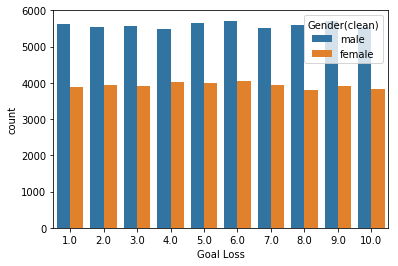

In [145]:
%matplotlib inline
import seaborn as sns

sns.countplot(data=vis, x="Goal Loss", hue="Gender(clean)")

In [134]:
vis_table["female"]

Goal Loss
1.0     3884
2.0     3948
3.0     3912
4.0     4034
5.0     3984
6.0     4039
7.0     3933
8.0     3801
9.0     3918
10.0    3823
Name: female, dtype: int64

In [129]:
import matplotlib.pyplot as plt

In [138]:
%matplotlib
plt.hist(vis_table["female"])
# plt.plot(vis_table["female"], vis_table["male"])
# plt.scatter(vis_table["female"], vis_table["male"])
plt.show()

Using matplotlib backend: MacOSX


In [ ]:
## data.loc[data['Current Weight'] - data['Goal Weight'], 'Goal']

## print(data.shape)
## data.head()

** 19. '가입 개월 수'를 숫자로 표현하기 **

'가입 개월 수' 컬럼을 숫자로 정리해주세요. 현재 3개월, 6개월, 12개월로 되어있는데, 이를 3, 6, 12로 정리하시면 됩니다.

또한 0개월은 0이 아닌 NaN으로 집어넣어 주세요.


# Q6. 어떤 코드가 좋은 코드인지 기준

In [ ]:
# Write code here!

** 19-1. Method 1 **
- data types : object

In [92]:
# def paid_plan_to_number(paid_plan):
#     if paid_plan == '0개월':
#         paid_plan = np.nan
#     elif paid_plan == '3개월' or '6개월' or '12개월':
#         paid_plan = paid_plan.replace("개월", "")
#         return int(paid_plan)
#     return int(paid_plan)
    
# data['Paid_plan_int'] = data['Paid Plan'].apply(paid_plan_to_number)

# print(data.shape)
# data.head()

In [93]:
# data['Paid_plan_int'].value_counts()

In [94]:
# data['Paid_plan_int'].dtypes

** 19-2. Method 2 **
- 장점 : 가독성
- 단점 : 경우의 수 한계(4가지만)

In [53]:
data.loc[data['Paid Plan'] == "0개월", 'Paid Plan(number)'] = np.nan
data.loc[data['Paid Plan'] == "3개월", 'Paid Plan(number)'] = 3
data.loc[data['Paid Plan'] == "6개월", 'Paid Plan(number)'] = 6
data.loc[data['Paid Plan'] == "12개월",'Paid Plan(number)'] = 12

print(data.shape)
data[['Paid Plan', 'Paid Plan(number)']].head(10)

(106839, 19)


,Paid Plan,Paid Plan(number)
0,0개월,NaN
1,0개월,NaN
2,0개월,NaN
3,0개월,NaN
4,0개월,NaN
5,3개월,3.0
6,12개월,12.0
7,0개월,NaN
8,0개월,NaN
9,3개월,3.0


In [54]:
print(data['Paid Plan(number)'].dtypes)
data['Paid Plan(number)'].value_counts()

float64


3.0     21250
6.0      7291
12.0     3343
Name: Paid Plan(number), dtype: int64

** 19-3. Method 3 **
- ```lambda```
- 장점 : 간결함
- 단점 : 가독성

In [55]:
data['Paid Plan(number)'] = data['Paid Plan'].apply(lambda month: int(month.replace("개월", "")))

data.loc[data["Paid Plan(number)"] == 0, "Paid Plan(number)"] = np.nan

data[["Paid Plan", "Paid Plan(number)"]].head(10)

,Paid Plan,Paid Plan(number)
0,0개월,NaN
1,0개월,NaN
2,0개월,NaN
3,0개월,NaN
4,0개월,NaN
5,3개월,3.0
6,12개월,12.0
7,0개월,NaN
8,0개월,NaN
9,3개월,3.0


In [56]:
print(data['Paid Plan(number)'].dtypes)
data['Paid Plan(number)'].value_counts()

float64


3.0     21250
6.0      7291
12.0     3343
Name: Paid Plan(number), dtype: int64

# Q7. 코드 설명
- ```.str.replace("개월","").astype('int')```

** 19-4. Method 4 **
- ```.str.replace("개월","").astype('int')```
- .str을 하는 이유는 data type이 object니까?

In [57]:
data["Paid Plan"].dtypes

dtype('O')

In [58]:
data["Paid Plan(number)"] = data["Paid Plan"].str.replace("개월", "").astype('int')

data.loc[data["Paid Plan(number)"] == 0, "Paid Plan(number)"] = np.nan

data[["Paid Plan", "Paid Plan(number)"]].head(10)

,Paid Plan,Paid Plan(number)
0,0개월,NaN
1,0개월,NaN
2,0개월,NaN
3,0개월,NaN
4,0개월,NaN
5,3개월,3.0
6,12개월,12.0
7,0개월,NaN
8,0개월,NaN
9,3개월,3.0


In [59]:
print(data['Paid Plan(number)'].dtypes)
data['Paid Plan(number)'].value_counts()

float64


3.0     21250
6.0      7291
12.0     3343
Name: Paid Plan(number), dtype: int64

** 20. '음주 여부'를 숫자로 표현하기**

'음주 여부' 컬럼을 숫자로 정리해주세요. 현재 1) 주 2회, 2) 주 1회, 3) 월 2회, 4) 월 1회 5) 안 마심으로 되어 있습니다만, 이를 월 기준 음주 횟수로 통일해주세요. 여기서 월은 30일로, 주는 4주로 고정합니다.

가령 1) 주 2회는 8, 2) 주 1회는 4, 3) 월 2회는 2, 4) 월 1회는 1, 5) 안 마심은 0으로 표현하면 됩니다.

In [ ]:
# Write code here!

In [60]:
data['Drinking'].value_counts()

월 2회    32214
주 1회    32194
월 1회    21037
주 2회    10813
안 마심    10581
Name: Drinking, dtype: int64

** 20-1. Method 1 **

In [61]:
def reshape_drinking(drinking):
    if drinking == '월 2회':
        drinking = 2
    elif drinking == '주 1회':
        drinking = 4
    elif drinking == '월 1회':
        drinking = 1
    elif drinking == '주 2회':
        drinking = 8
    elif drinking == "안 마심":
        drinking = 0
    return drinking

In [62]:
data['Drinking(int)'] = data['Drinking'].apply(reshape_drinking)

print(data.shape)
data.head()

(106839, 20)


,Name,Gender,Phone Number,Age,Current Weight,Goal Weight,Height,Smoking,Drinking,Request Counselling,Joined At,Updated At,Paid Plan,Paid,Drinking(Bool),Smoking-Drinking,Gender(clean),Goal Loss,Paid Plan(number),Drinking(int)
0,안원준,남성,010-2292-6251,31.0,78.0,68.0,176.0,False,주 1회,False,2016년 07월 05일,2016년 07월 05일,0개월,False,True,False-True,male,10.0,NaN,4
1,유세아,여성,01045795881,39.0,56.0,51.0,172.0,True,월 1회,False,2016년 10월 02일,2016년 11월 29일,0개월,False,True,True-True,female,5.0,NaN,1
2,송솔은,여성,010-7719-8346,NaN,NaN,21.0,167.0,True,주 1회,False,2017년 09월 06일,2017년 09월 06일,0개월,False,True,True-True,female,NaN,NaN,4
3,백서원,여성,01011947169,36.0,67.0,65.0,NaN,True,안 마심,False,2017년 06월 02일,2017년 07월 28일,0개월,False,False,True-False,female,2.0,NaN,0
4,박서은,여성,010-2575-6398,42.0,60.0,57.0,167.0,False,안 마심,True,2017년 05월 07일,2017년 05월 07일,0개월,False,False,False-False,female,3.0,NaN,0


In [63]:
print(data['Drinking(int)'].dtypes)
data['Drinking(int)'].value_counts()

int64


2    32214
4    32194
1    21037
8    10813
0    10581
Name: Drinking(int), dtype: int64

** 20-2. Method 2 **

In [64]:
data.loc[data["Drinking"] == "주 2회", "Drinking(number)"] = 8
data.loc[data["Drinking"] == "주 1회", "Drinking(number)"] = 4
data.loc[data["Drinking"] == "월 2회", "Drinking(number)"] = 2
data.loc[data["Drinking"] == "월 1회", "Drinking(number)"] = 1
data.loc[data["Drinking"] == "안 마심", "Drinking(number)"] = 0

print(data["Drinking(number)"].unique())
data[["Drinking", "Drinking(number)"]].head()

[4. 1. 0. 2. 8.]


,Drinking,Drinking(number)
0,주 1회,4.0
1,월 1회,1.0
2,주 1회,4.0
3,안 마심,0.0
4,안 마심,0.0


In [65]:
print(data['Drinking(number)'].dtypes)
data['Drinking(number)'].value_counts()

float64


2.0    32214
4.0    32194
1.0    21037
8.0    10813
0.0    10581
Name: Drinking(number), dtype: int64

## 과제(고급)

** 21.휴대폰 번호 정리하기 **

다양한 표현으로 되어있는 휴대폰 번호를 010-xxxx-xxxx 로 통일해주세요. 가령 휴대폰 번호에 하이픈이 없으면 넣어주시면 됩니다.

또한 unknown으로 되어있거나 비어있는 값은 NaN으로 처리해주세요.

In [110]:
# data['Phone Number'].value_counts()

In [ ]:
# import re

In [ ]:
# def reshape_phone_number(phone_number):
#     if phone_number == 'unknown':
#         phone_number == np.nan
#     elif "-" not in phone_number:
#         phone_number = re.sub(phone_number)

# Q8. 정상적인 패턴이 들어간 경우라면? 
- 010-2292-6251

In [68]:
def clean_phone_number(number):
    if pd.isnull(number):
        return number
    
    new_number = number[0:3] + "-" + number[3:7] + "-" + number[7:]
    
    return new_number

# phone_number = "01022926251"
# phone_number = np.nan
phone_number = "010-2292-6251"

clean_phone_number(phone_number)

'010--229-2-6251'

In [67]:
data['Phone Number(clean)'] = data['Phone Number'].str.replace("-", "")
data['Phone Number(clean)'] = data['Phone Number(clean)'].apply(clean_phone_number)

print(data.shape)
data[['Phone Number', 'Phone Number(clean)']].head(10)

(106839, 22)


,Phone Number,Phone Number(clean)
0,010-2292-6251,010-2292-6251
1,01045795881,010-4579-5881
2,010-7719-8346,010-7719-8346
3,01011947169,010-1194-7169
4,010-2575-6398,010-2575-6398
5,010-7299-1288,010-7299-1288
6,010-2132-4484,010-2132-4484
7,01019249265,010-1924-9265
8,01045337615,010-4533-7615
9,01036423916,010-3642-3916


** 22. 날짜를 사용 가능하게 정리하기 **

현재 '회원 가입일' 컬럼과 '회원 정보 갱신일' 컬럼은 20xx년 xx월 xx일 과 같은 형식으로 되어있습니다.

이 데이터를 현재 판다스에서는 날짜 컬럼이 아닌 문자열(텍스트) 컬럼으로 인식하고 있는데, 이 컬럼을 날짜 컬럼으로 인식할 수 있도록 수정해주세요.

In [ ]:
# Write code here!

In [69]:
data.dtypes

Name                    object
Gender                  object
Phone Number            object
Age                    float64
Current Weight         float64
Goal Weight            float64
Height                 float64
Smoking                 object
Drinking                object
Request Counselling       bool
Joined At               object
Updated At              object
Paid Plan               object
Paid                      bool
Drinking(Bool)            bool
Smoking-Drinking        object
Gender(clean)           object
Goal Loss              float64
Paid Plan(number)      float64
Drinking(int)            int64
Drinking(number)       float64
Phone Number(clean)     object
dtype: object

In [70]:
data[["Joined At", "Updated At"]].head()

,Joined At,Updated At
0,2016년 07월 05일,2016년 07월 05일
1,2016년 10월 02일,2016년 11월 29일
2,2017년 09월 06일,2017년 09월 06일
3,2017년 06월 02일,2017년 07월 28일
4,2017년 05월 07일,2017년 05월 07일


In [ ]:
# transaction = pd.read_csv("../data/transaction/transaction.csv",
#                          index_col="Name", # 인덱스로 사용할 컬럼
#                          usecols=["Name", "date", "amount"], # 필요한 컬럼
#                          parse_dates=["date"] # 형식이 datetime으로 변경됨, 빈번하게 쓰임
#                          )
# transaction

In [71]:
tmp = pd.read_csv("../data/tkx-user-data.csv",
                  parse_dates=['회원 가입일', "회원 정보 갱신일"],
                  date_parser=lambda datetime: pd.datetime.strptime(datetime, "%Y년 %m월 %d일"))
tmp.dtypes

이름                   object
성별                   object
전화번호                 object
나이                   object
현재 체중                object
목표 체중                object
키                    object
회원 가입일       datetime64[ns]
회원 정보 갱신일    datetime64[ns]
흡연 여부                object
음주 여부                object
가입 개월 수              object
개인상담 요청              object
dtype: object

In [72]:
tmp.head()

,이름,성별,전화번호,나이,현재 체중,목표 체중,키,회원 가입일,회원 정보 갱신일,흡연 여부,음주 여부,가입 개월 수,개인상담 요청
0,안원준,남성,010-2292-6251,31세,78,68,176,2016-07-05,2016-07-05,아니오,주 1회,0개월,아니요
1,유세아,여성,01045795881,39,56kg,51kg,172,2016-10-02,2016-11-29,예,월 1회,0개월,아니요
2,송솔은,여성,010-7719-8346,0,29,21,167,2017-09-06,2017-09-06,예,주 1회,0개월,아니요
3,백서원,여성,01011947169,36,67,65,0,2017-06-02,2017-07-28,예,안 마심,0개월,아니요
4,박서은,여성,010-2575-6398,42,60,57,167,2017-05-07,2017-05-07,아니오,안 마심,0개월,예


# Q9. 데이터 타입은 변했는데, 포맷대로 나오지 않는다?
- datetime64[ns]

In [73]:
data["Joined At"] = pd.to_datetime(data["Joined At"], format="%Y년 %m월 %d일")
data["Updated At"] = pd.to_datetime(data["Updated At"], format="%Y년 %m월 %d일")

print(data.dtypes)
data.head()

Name                           object
Gender                         object
Phone Number                   object
Age                           float64
Current Weight                float64
Goal Weight                   float64
Height                        float64
Smoking                        object
Drinking                       object
Request Counselling              bool
Joined At              datetime64[ns]
Updated At             datetime64[ns]
Paid Plan                      object
Paid                             bool
Drinking(Bool)                   bool
Smoking-Drinking               object
Gender(clean)                  object
Goal Loss                     float64
Paid Plan(number)             float64
Drinking(int)                   int64
Drinking(number)              float64
Phone Number(clean)            object
dtype: object


,Name,Gender,Phone Number,Age,Current Weight,Goal Weight,Height,Smoking,Drinking,Request Counselling,...,Paid Plan,Paid,Drinking(Bool),Smoking-Drinking,Gender(clean),Goal Loss,Paid Plan(number),Drinking(int),Drinking(number),Phone Number(clean)
0,안원준,남성,010-2292-6251,31.0,78.0,68.0,176.0,False,주 1회,False,...,0개월,False,True,False-True,male,10.0,NaN,4,4.0,010-2292-6251
1,유세아,여성,01045795881,39.0,56.0,51.0,172.0,True,월 1회,False,...,0개월,False,True,True-True,female,5.0,NaN,1,1.0,010-4579-5881
2,송솔은,여성,010-7719-8346,NaN,NaN,21.0,167.0,True,주 1회,False,...,0개월,False,True,True-True,female,NaN,NaN,4,4.0,010-7719-8346
3,백서원,여성,01011947169,36.0,67.0,65.0,NaN,True,안 마심,False,...,0개월,False,False,True-False,female,2.0,NaN,0,0.0,010-1194-7169
4,박서은,여성,010-2575-6398,42.0,60.0,57.0,167.0,False,안 마심,True,...,0개월,False,False,False-False,female,3.0,NaN,0,0.0,010-2575-6398


In [74]:
data[["Joined At", "Updated At"]].head()

,Joined At,Updated At
0,2016-07-05,2016-07-05
1,2016-10-02,2016-11-29
2,2017-09-06,2017-09-06
3,2017-06-02,2017-07-28
4,2017-05-07,2017-05-07


** 23. 날짜를 기준으로 분석하기 **

22번에서 날짜 컬럼을 만들었으면 다음을 분석해주세요.

1. 월별 전체 회원 가입량
2. 월 별 유료/무료 회원 가입량의 차이
3. 월 별 남성/여성 회원 가입량의 차이

In [ ]:
# Write code here!

In [75]:
data["Joined At(month)"] = data["Joined At"].dt.month

print(data.shape)
data[["Joined At", "Joined At(month)"]].head()

(106839, 23)


,Joined At,Joined At(month)
0,2016-07-05,7
1,2016-10-02,10
2,2017-09-06,9
3,2017-06-02,6
4,2017-05-07,5


In [76]:
data["Joined At(month)"].value_counts().sort_index()

1     8964
2     8305
3     8985
4     8797
5     9077
6     8793
7     9079
8     9083
9     8800
10    8994
11    8770
12    9192
Name: Joined At(month), dtype: int64

# Q10. pivot table
- ```aggfunc=len```?

In [77]:
tmp = data[["Joined At(month)", "Gender(clean)"]]
tmp.pivot_table(index='Joined At(month)', columns='Gender(clean)',  aggfunc=len)

Gender(clean),female,male
Joined At(month),,
1,3675,5289
2,3454,4851
3,3734,5251
4,3577,5220
5,3735,5342
6,3597,5196
7,3728,5351
8,3821,5262
9,3675,5125


# Q11. 기준 바꾸기 : 년월별?

In [78]:
data['year_month'] = data["Joined At"].dt.to_period('M')
# df['month_year'] = date_column.dt.to_period('M')

data.head()

,Name,Gender,Phone Number,Age,Current Weight,Goal Weight,Height,Smoking,Drinking,Request Counselling,...,Drinking(Bool),Smoking-Drinking,Gender(clean),Goal Loss,Paid Plan(number),Drinking(int),Drinking(number),Phone Number(clean),Joined At(month),year_month
0,안원준,남성,010-2292-6251,31.0,78.0,68.0,176.0,False,주 1회,False,...,True,False-True,male,10.0,NaN,4,4.0,010-2292-6251,7,2016-07
1,유세아,여성,01045795881,39.0,56.0,51.0,172.0,True,월 1회,False,...,True,True-True,female,5.0,NaN,1,1.0,010-4579-5881,10,2016-10
2,송솔은,여성,010-7719-8346,NaN,NaN,21.0,167.0,True,주 1회,False,...,True,True-True,female,NaN,NaN,4,4.0,010-7719-8346,9,2017-09
3,백서원,여성,01011947169,36.0,67.0,65.0,NaN,True,안 마심,False,...,False,True-False,female,2.0,NaN,0,0.0,010-1194-7169,6,2017-06
4,박서은,여성,010-2575-6398,42.0,60.0,57.0,167.0,False,안 마심,True,...,False,False-False,female,3.0,NaN,0,0.0,010-2575-6398,5,2017-05


In [79]:
print(data["year_month"].dtypes)
data["year_month"].unique()

object


array([Period('2016-07', 'M'), Period('2016-10', 'M'),
       Period('2017-09', 'M'), Period('2017-06', 'M'),
       Period('2017-05', 'M'), Period('2017-12', 'M'),
       Period('2016-12', 'M'), Period('2017-08', 'M'),
       Period('2017-11', 'M'), Period('2016-04', 'M'),
       Period('2016-11', 'M'), Period('2017-01', 'M'),
       Period('2017-07', 'M'), Period('2016-08', 'M'),
       Period('2016-09', 'M'), Period('2016-02', 'M'),
       Period('2017-04', 'M'), Period('2016-03', 'M'),
       Period('2016-05', 'M'), Period('2016-01', 'M'),
       Period('2017-02', 'M'), Period('2016-06', 'M'),
       Period('2017-10', 'M'), Period('2017-03', 'M')], dtype=object)

In [80]:
data["year_month"].value_counts().sort_index()

2016-01    4407
2016-02    4242
2016-03    4434
2016-04    4427
2016-05    4604
2016-06    4390
2016-07    4606
2016-08    4497
2016-09    4507
2016-10    4516
2016-11    4411
2016-12    4568
2017-01    4557
2017-02    4063
2017-03    4551
2017-04    4370
2017-05    4473
2017-06    4403
2017-07    4473
2017-08    4586
2017-09    4293
2017-10    4478
2017-11    4359
2017-12    4624
Freq: M, Name: year_month, dtype: int64

In [81]:
print(data["Joined At(month)"].dtypes)
data["Joined At(month)"].unique()

int64


array([ 7, 10,  9,  6,  5, 12,  8, 11,  4,  1,  2,  3])

In [82]:
data["Joined At(month)"].value_counts().sort_index()

1     8964
2     8305
3     8985
4     8797
5     9077
6     8793
7     9079
8     9083
9     8800
10    8994
11    8770
12    9192
Name: Joined At(month), dtype: int64

** 24. 회원 정보가 맞는지 여부를 확인하는 컬럼을 만들기 **

더 정확한 데이터 분석을 위해서는, 현재까지 고객님이 기업한 회원 정보가 정확한지를 확인하는 작업이 필요합니다. 분석팀에서 데이터를 다음과 같이 정리하면, 오퍼레이션 팀과 코칭 팀이 협업을 통해서 고객 정보를 개선하고, 더 좋은 서비스를 제공할 수 있을 것 같습니다. 다음의 내용이 담겨있는 새로운 컬럼을 하나 만들어주세요. 해당 컬럼에는 reject / counselling / duplicated / confirmed 라는 결과값이 들어가야 합니다.

다음의 경우에는 재기입을 요청한다. (reject)
* 전화번호가 비어있는 경우

다음의 경우는 트레이너와 상담을 유도한다. (counselling)
* 상담 요청(counselling)이 True인 사람.

다음의 경우에는 중복을 확인한다. (duplicated)
* 동일한 이름에 동일한 전화번호를 찾아낸다. 이는 중복되었다고 가정한다.

나머지는 문제가 없다. (confirmed)

In [ ]:
# Write code here!

In [83]:
# def check_customer_info(info):
#     if pd.isnull == info:
#         info = "reject"
#         return info
#     elif info == True:
#         info = "counselling"
#         return info
#     elif info ==

In [84]:
data.loc[data['Phone Number(clean)'].isnull(), 'result'] = "reject"
data.loc[data['Request Counselling'] == True, 'result'] = "counselling"

print(data.shape)
data.head()

(106839, 25)


,Name,Gender,Phone Number,Age,Current Weight,Goal Weight,Height,Smoking,Drinking,Request Counselling,...,Smoking-Drinking,Gender(clean),Goal Loss,Paid Plan(number),Drinking(int),Drinking(number),Phone Number(clean),Joined At(month),year_month,result
0,안원준,남성,010-2292-6251,31.0,78.0,68.0,176.0,False,주 1회,False,...,False-True,male,10.0,NaN,4,4.0,010-2292-6251,7,2016-07,NaN
1,유세아,여성,01045795881,39.0,56.0,51.0,172.0,True,월 1회,False,...,True-True,female,5.0,NaN,1,1.0,010-4579-5881,10,2016-10,NaN
2,송솔은,여성,010-7719-8346,NaN,NaN,21.0,167.0,True,주 1회,False,...,True-True,female,NaN,NaN,4,4.0,010-7719-8346,9,2017-09,NaN
3,백서원,여성,01011947169,36.0,67.0,65.0,NaN,True,안 마심,False,...,True-False,female,2.0,NaN,0,0.0,010-1194-7169,6,2017-06,NaN
4,박서은,여성,010-2575-6398,42.0,60.0,57.0,167.0,False,안 마심,True,...,False-False,female,3.0,NaN,0,0.0,010-2575-6398,5,2017-05,counselling


In [87]:
data[['Name', 'Gender(clean)', 'result']].head(20)

,Name,Gender(clean),result
0,안원준,male,NaN
1,유세아,female,NaN
2,송솔은,female,NaN
3,백서원,female,NaN
4,박서은,female,counselling
5,전재성,male,NaN
6,유수애,female,NaN
7,허태연,male,NaN
8,윤소현,female,NaN
9,황윤일,male,NaN


In [91]:
data["Id"] = data["Name"] + "_" + data["Phone Number"]

ids = data["Id"].value_counts()
duplicated_users = ids[ids > 1].index

duplicated_users.shape

(946,)

In [96]:
# print(type(ids))
# ids.head()

<class 'pandas.core.series.Series'>


강승혁_01089442944      2
강지율_010-7799-8892    2
허은오_010-3638-3426    2
백소희_01045445277      2
문채민_01012874743      2
Name: Id, dtype: int64

In [98]:
# ids.shape

(95253,)

In [112]:
# ids[1]
ids.index[0]

'강승혁_01089442944'

In [108]:
# ids[ids > 1]

In [106]:
# ids[ids > 1].index

Index(['강승혁_01089442944', '강지율_010-7799-8892', '허은오_010-3638-3426',
       '백소희_01045445277', '문채민_01012874743', '안인태_010-2944-8348',
       '박은찬_010-4774-8268', '유현준_010-4128-3781', '신효찬_010-4282-3733',
       '송성찬_01068582516',
       ...
       '오솔희_010-6337-4364', '서지빈_01046125798', '장이안_01077244772',
       '조영준_01057892627', '최지환_010-2128-2249', '임슬지_010-2271-2933',
       '박재현_01027377812', '임설윤_01031366983', '유선이_01023827439',
       '조솔아_01092224415'],
      dtype='object', length=946)

In [113]:
# duplicated_users

Index(['강승혁_01089442944', '강지율_010-7799-8892', '허은오_010-3638-3426',
       '백소희_01045445277', '문채민_01012874743', '안인태_010-2944-8348',
       '박은찬_010-4774-8268', '유현준_010-4128-3781', '신효찬_010-4282-3733',
       '송성찬_01068582516',
       ...
       '오솔희_010-6337-4364', '서지빈_01046125798', '장이안_01077244772',
       '조영준_01057892627', '최지환_010-2128-2249', '임슬지_010-2271-2933',
       '박재현_01027377812', '임설윤_01031366983', '유선이_01023827439',
       '조솔아_01092224415'],
      dtype='object', length=946)

In [114]:
data.loc[data['Id'].isin(duplicated_users), 'result'] = "duplicated"

print(data.shape)
data.head()

(106839, 26)


,Name,Gender,Phone Number,Age,Current Weight,Goal Weight,Height,Smoking,Drinking,Request Counselling,...,Gender(clean),Goal Loss,Paid Plan(number),Drinking(int),Drinking(number),Phone Number(clean),Joined At(month),year_month,result,Id
0,안원준,남성,010-2292-6251,31.0,78.0,68.0,176.0,False,주 1회,False,...,male,10.0,NaN,4,4.0,010-2292-6251,7,2016-07,NaN,안원준_010-2292-6251
1,유세아,여성,01045795881,39.0,56.0,51.0,172.0,True,월 1회,False,...,female,5.0,NaN,1,1.0,010-4579-5881,10,2016-10,NaN,유세아_01045795881
2,송솔은,여성,010-7719-8346,NaN,NaN,21.0,167.0,True,주 1회,False,...,female,NaN,NaN,4,4.0,010-7719-8346,9,2017-09,NaN,송솔은_010-7719-8346
3,백서원,여성,01011947169,36.0,67.0,65.0,NaN,True,안 마심,False,...,female,2.0,NaN,0,0.0,010-1194-7169,6,2017-06,NaN,백서원_01011947169
4,박서은,여성,010-2575-6398,42.0,60.0,57.0,167.0,False,안 마심,True,...,female,3.0,NaN,0,0.0,010-2575-6398,5,2017-05,counselling,박서은_010-2575-6398


In [115]:
data.loc[data["result"].isnull(), "result"] = "confirmed"

print(data.shape)
data.head()

(106839, 26)


,Name,Gender,Phone Number,Age,Current Weight,Goal Weight,Height,Smoking,Drinking,Request Counselling,...,Gender(clean),Goal Loss,Paid Plan(number),Drinking(int),Drinking(number),Phone Number(clean),Joined At(month),year_month,result,Id
0,안원준,남성,010-2292-6251,31.0,78.0,68.0,176.0,False,주 1회,False,...,male,10.0,NaN,4,4.0,010-2292-6251,7,2016-07,confirmed,안원준_010-2292-6251
1,유세아,여성,01045795881,39.0,56.0,51.0,172.0,True,월 1회,False,...,female,5.0,NaN,1,1.0,010-4579-5881,10,2016-10,confirmed,유세아_01045795881
2,송솔은,여성,010-7719-8346,NaN,NaN,21.0,167.0,True,주 1회,False,...,female,NaN,NaN,4,4.0,010-7719-8346,9,2017-09,confirmed,송솔은_010-7719-8346
3,백서원,여성,01011947169,36.0,67.0,65.0,NaN,True,안 마심,False,...,female,2.0,NaN,0,0.0,010-1194-7169,6,2017-06,confirmed,백서원_01011947169
4,박서은,여성,010-2575-6398,42.0,60.0,57.0,167.0,False,안 마심,True,...,female,3.0,NaN,0,0.0,010-2575-6398,5,2017-05,counselling,박서은_010-2575-6398


**25. VIP 찾아내기**

다음의 고객을 특별 관리 대상으로 지정합니다. 특별 관리 대상이라고 함은, TKX 서비스의 VIP 플랜을 구매할 확률이 높은 분들을 의미합니다.

1. 트레이너와 상담을 요청한 사람. (counselling)
2. 상담을 요청하지 않은 사람 중, (현재 체중 - 목표 체중) 이 가장 높은 상위 1,000 명.

이 사람들을 특별관리 대상으로 지정하며, VIP라는 이름의 컬럼에 True 값을 넣으면 됩니다. 이후에는 오퍼레이션/코치 팀이 해당 고객님을 개별 컨택하여, 적극적으로 VIP 플랜을 구매하실 수 있도록 노력할 생각입니다. (특별관리 대상이 아닌 분들은 VIP 컬럼에 False 값을 넣으면 됩니다)

또한 전체 데이터와는 별개로, VIP 고객들만을 따로 뽑아내서 CSV파일로 저장할 수 있다면 좋겠습니다.

In [ ]:
# Write code here!

In [119]:
data.loc[data["Request Counselling"] == True, "VIP"] = True

non_counselling = data[data["Request Counselling"] == False]

print(non_counselling.shape)
non_counselling.head()

(96260, 27)


,Name,Gender,Phone Number,Age,Current Weight,Goal Weight,Height,Smoking,Drinking,Request Counselling,...,Goal Loss,Paid Plan(number),Drinking(int),Drinking(number),Phone Number(clean),Joined At(month),year_month,result,Id,VIP
0,안원준,남성,010-2292-6251,31.0,78.0,68.0,176.0,False,주 1회,False,...,10.0,NaN,4,4.0,010-2292-6251,7,2016-07,confirmed,안원준_010-2292-6251,NaN
1,유세아,여성,01045795881,39.0,56.0,51.0,172.0,True,월 1회,False,...,5.0,NaN,1,1.0,010-4579-5881,10,2016-10,confirmed,유세아_01045795881,NaN
2,송솔은,여성,010-7719-8346,NaN,NaN,21.0,167.0,True,주 1회,False,...,NaN,NaN,4,4.0,010-7719-8346,9,2017-09,confirmed,송솔은_010-7719-8346,NaN
3,백서원,여성,01011947169,36.0,67.0,65.0,NaN,True,안 마심,False,...,2.0,NaN,0,0.0,010-1194-7169,6,2017-06,confirmed,백서원_01011947169,NaN
5,전재성,남성,010-7299-1288,39.0,76.0,73.0,171.0,False,월 1회,False,...,3.0,3.0,1,1.0,010-7299-1288,12,2017-12,confirmed,전재성_010-7299-1288,NaN


In [120]:
# non_counselling['VIP'].value_counts()

Series([], Name: VIP, dtype: int64)

In [121]:
vip100 = non_counselling.sort_values(by="Goal Loss", ascending=False).head(100)

print(vip100.shape)
vip100.head()

(100, 27)


,Name,Gender,Phone Number,Age,Current Weight,Goal Weight,Height,Smoking,Drinking,Request Counselling,...,Goal Loss,Paid Plan(number),Drinking(int),Drinking(number),Phone Number(clean),Joined At(month),year_month,result,Id,VIP
0,안원준,남성,010-2292-6251,31.0,78.0,68.0,176.0,False,주 1회,False,...,10.0,NaN,4,4.0,010-2292-6251,7,2016-07,confirmed,안원준_010-2292-6251,NaN
89669,고성연,여성,010-6416-8764,NaN,61.0,51.0,175.0,False,월 2회,False,...,10.0,NaN,2,2.0,010-6416-8764,7,2016-07,duplicated,고성연_010-6416-8764,NaN
61689,김성수,남성,010-4796-6498,NaN,77.0,67.0,180.0,False,주 1회,False,...,10.0,3.0,4,4.0,010-4796-6498,7,2017-07,confirmed,김성수_010-4796-6498,NaN
9849,강성희,남성,010-5557-4571,33.0,81.0,71.0,190.0,False,월 1회,False,...,10.0,6.0,1,1.0,010-5557-4571,7,2016-07,confirmed,강성희_010-5557-4571,NaN
61697,오소윤,여성,01051648756,26.0,66.0,56.0,167.0,False,주 1회,False,...,10.0,3.0,4,4.0,010-5164-8756,8,2017-08,confirmed,오소윤_01051648756,NaN


In [122]:
data.loc[data["Id"].isin(vip100["Id"]), "VIP"] = True
data.loc[data["VIP"].isnull(), "VIP"] = False

print(data.shape)
data.head()

(106839, 27)


,Name,Gender,Phone Number,Age,Current Weight,Goal Weight,Height,Smoking,Drinking,Request Counselling,...,Goal Loss,Paid Plan(number),Drinking(int),Drinking(number),Phone Number(clean),Joined At(month),year_month,result,Id,VIP
0,안원준,남성,010-2292-6251,31.0,78.0,68.0,176.0,False,주 1회,False,...,10.0,NaN,4,4.0,010-2292-6251,7,2016-07,confirmed,안원준_010-2292-6251,True
1,유세아,여성,01045795881,39.0,56.0,51.0,172.0,True,월 1회,False,...,5.0,NaN,1,1.0,010-4579-5881,10,2016-10,confirmed,유세아_01045795881,False
2,송솔은,여성,010-7719-8346,NaN,NaN,21.0,167.0,True,주 1회,False,...,NaN,NaN,4,4.0,010-7719-8346,9,2017-09,confirmed,송솔은_010-7719-8346,False
3,백서원,여성,01011947169,36.0,67.0,65.0,NaN,True,안 마심,False,...,2.0,NaN,0,0.0,010-1194-7169,6,2017-06,confirmed,백서원_01011947169,False
4,박서은,여성,010-2575-6398,42.0,60.0,57.0,167.0,False,안 마심,True,...,3.0,NaN,0,0.0,010-2575-6398,5,2017-05,counselling,박서은_010-2575-6398,True
